<a href="https://colab.research.google.com/github/Bindhubhavanan/Elite_Tech_Intern__Machine_Learning/blob/main/Elite_Tech_Intern_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6],
    'AnnualIncome': [15000, 20000, 35000, 40000, 50000, 60000],
    'SpendingScore': [30, 40, 70, 60, 80, 90]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
X = df[['AnnualIncome', 'SpendingScore']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
inertia = []
for k in range(1, len(X_scaled) +1 ):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

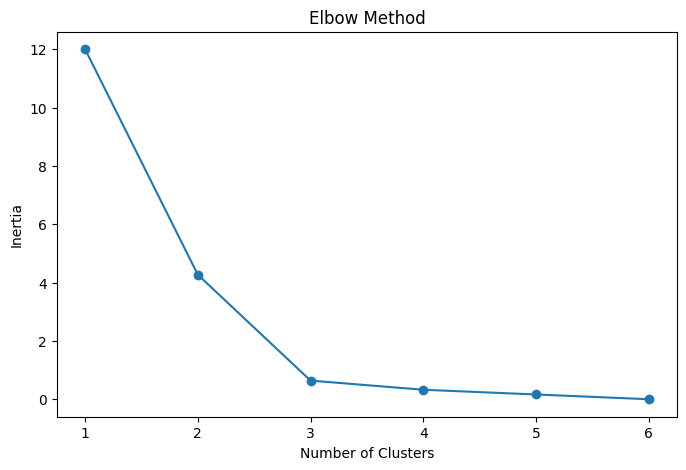

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(inertia) + 1), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
print(df)

   CustomerID  AnnualIncome  SpendingScore  Cluster
0           1         15000             30        1
1           2         20000             40        1
2           3         35000             70        0
3           4         40000             60        0
4           5         50000             80        2
5           6         60000             90        2


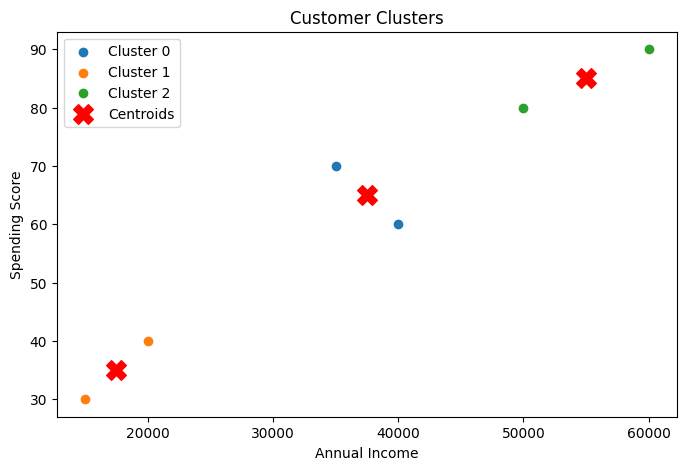

In [ ]:
plt.figure(figsize=(8, 5))
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['AnnualIncome'], cluster_data['SpendingScore'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=200, c='red', marker='X', label='Centroids')

plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()